In [1]:
#coding: utf-8


import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from six import BytesIO
from jqdata import *
from scipy import signal  
from scipy.fftpack import fft,ifft
#from six import StringIO

In [2]:

def index_sum_cap(index,date):
    a=get_index_weights(index, date)
    stock_list=get_index_stocks(index,date)
    weight=np.array(a['weight'].values)
    #print(a)
    q=query(valuation.code, valuation.circulating_market_cap).filter(valuation.code.in_(stock_list)) #???
    df = get_fundamentals(q, date)
    #print(len(weight),len(df['circulating_market_cap']),len(stock_list))
    df['true_cap']=df['circulating_market_cap']*weight
    sum_cap=df['true_cap'].sum()
    return sum_cap

In [13]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
index_cap=data['index_sum_cap'] 
index_close=data['close'] 
index_vol=data['volume'] 
index_mon=data['money'] 
index_real_cap=data['weight_cap'] 
mon_ratio=data['money_ratio'] 

index_monratio=index_mon/mon_ratio 
index_normal_mon=index_monratio/index_cap 
index_normal_mon=index_normal_mon/index_normal_mon[0]
index_normal_cap=data['normal_cap'] 
vol_ratio=data['vol_ratio'] 
index_normal_vol=np.array(index_vol)/index_normal_cap/10000000*np.array(vol_ratio) 
index_nor_vol=np.array(index_vol)/index_normal_cap/10000000
index_normal_realvol=np.array(index_vol)/index_real_cap 
index_vol_ratio=np.array(index_vol)/np.array(vol_ratio) 
print(index_close[-3:])
print(index_vol[-3:])

x_tick=[]
xtick=[]
for i in range(len(index_cap)): 
    if i%125 == 0:
        x_tick.append(data.index[i])
        xtick.append('')
    #else: x_tick.append("") 
#print(x_tick)
print(len(index_cap))
print(len(xtick))

2019-04-26    3889.27
2019-04-29    3900.33
2019-04-30    3913.21
Name: close, dtype: float64
2019-04-26    1.420081e+10
2019-04-29    1.538709e+10
2019-04-30    1.162334e+10
Name: volume, dtype: float64
3387
28


Text(0.5, 1.0, '指数成交量')

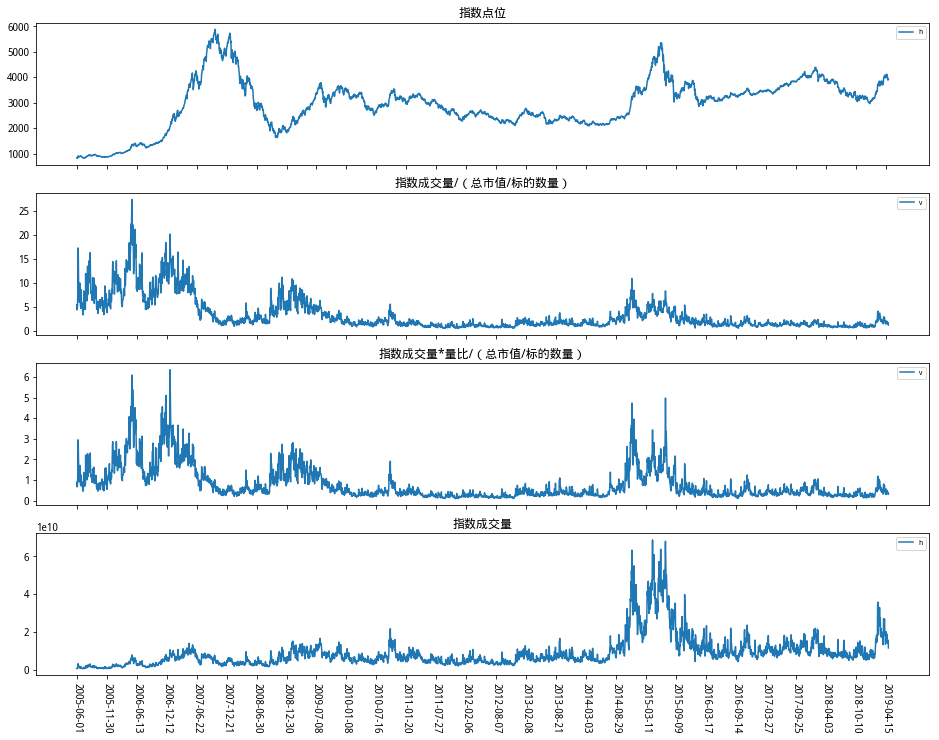

In [15]:
fig= plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(index_close)
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)
plt.title('indexpercentile')
plt.legend('hs300',loc='best',fontsize='x-small')
plt.subplot(412)
plt.plot(index_nor_vol)
plt.legend('vol/normal_cap',loc='best',fontsize='x-small')
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)
plt.title('indexvol/（marketcap/targetvol）')
plt.subplot(413)
plt.plot(index_normal_vol)
plt.legend('vol/cap',loc='best',fontsize='x-small')
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)
plt.title('indextran*ratio/（marketcap/targetvol）')
plt.subplot(414)
plt.plot(index_vol)
plt.xticks( x_tick,rotation = -90)
plt.legend('hs300_volume',loc='best',fontsize='x-small')
plt.title('indexvol')

AttributeError: 'NoneType' object has no attribute 'update'

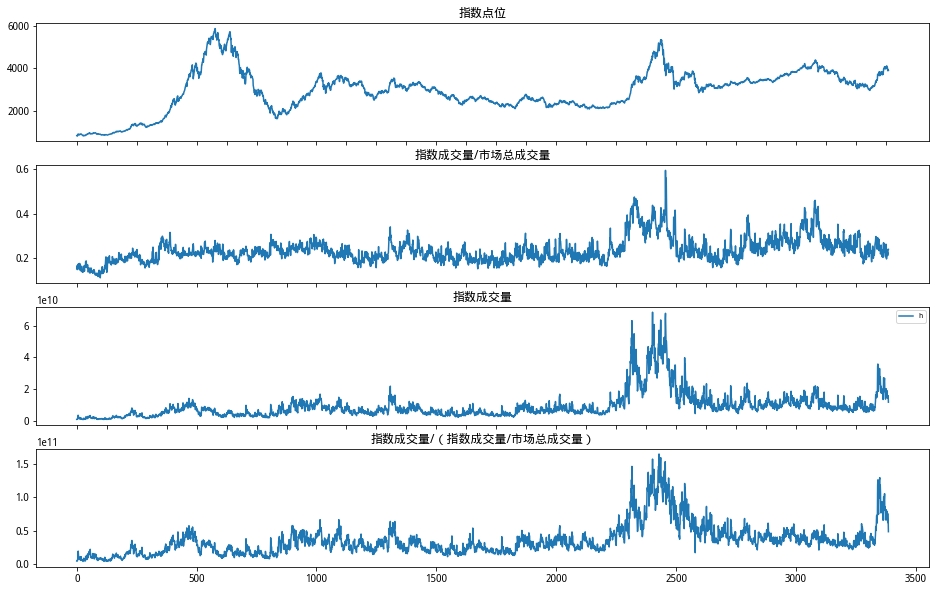

In [17]:
fig= plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(index_close)
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(412)
plt.plot(vol_ratio)
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(413)
plt.plot(index_vol)
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)
plt.legend('hs300_volume',loc='best',fontsize='x-small')

plt.subplot(414)
plt.plot(index_vol_ratio)

plt.xticks( x_tick,rotation = -90)

Text(0.5, 1.0, '总市值/标的数量')

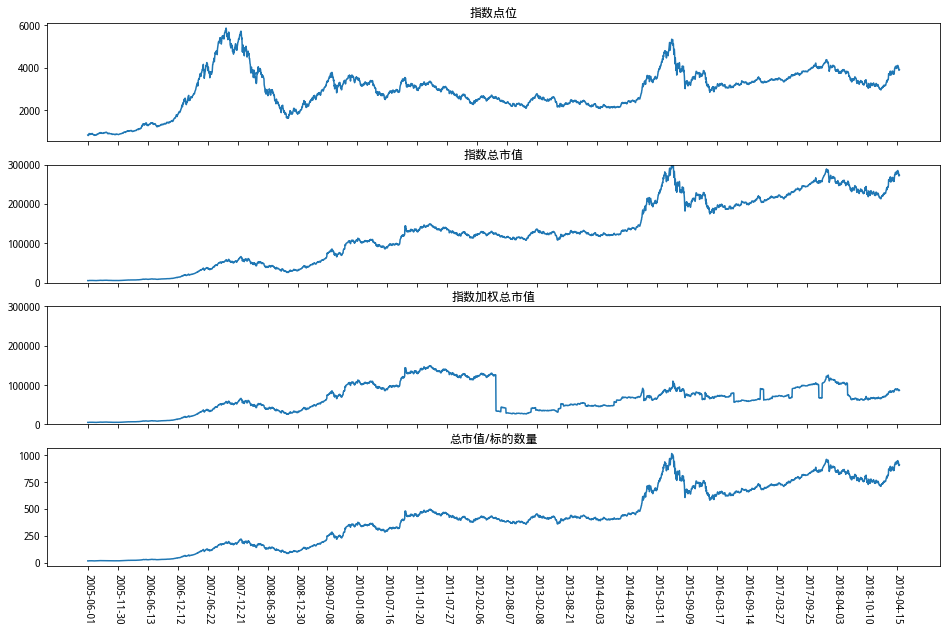

In [19]:
fig= plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(index_close)
plt.xticks( range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(412)
plt.plot(index_cap)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.ylim(0,300000)
plt.subplot(413)
plt.plot(index_real_cap)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.ylim(0,300000)
plt.subplot(414)
plt.plot(index_normal_cap)
plt.xticks( x_tick,rotation = -90)



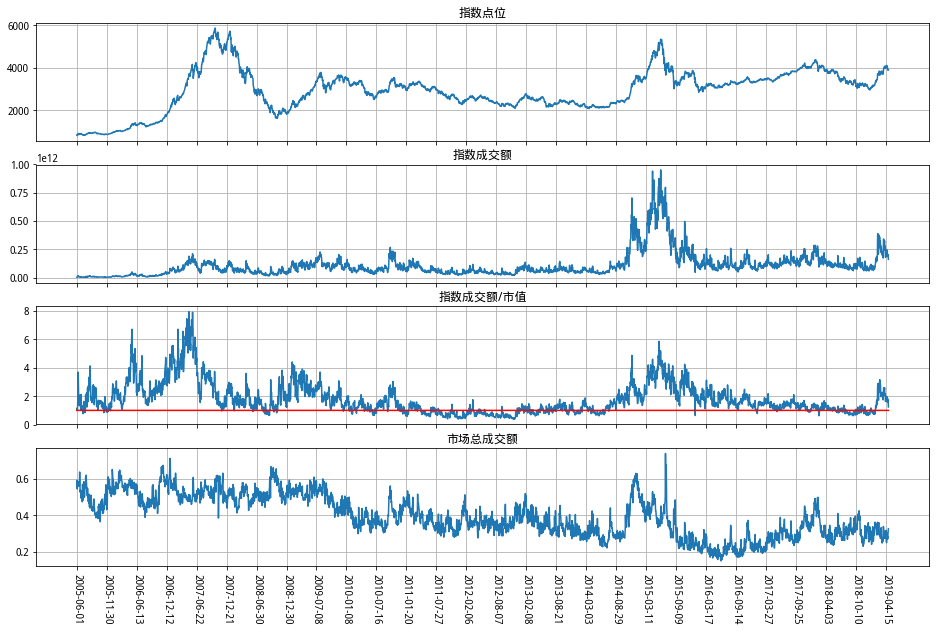

In [8]:
fig= plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(index_close)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)
plt.title('Percentile')
plt.grid()
plt.subplot(412)
plt.plot(index_mon)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(413)
plt.plot(index_normal_mon)
plt.plot([1]*len(index_normal_mon),'r')
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(414)
plt.plot(mon_ratio)
plt.xticks( x_tick,rotation = -90)

plt.grid()


沪深300数据获取函数

In [2]:
def market_money(date):
    stocks=get_all_securities(date=date)
    stock_list=stocks.index.tolist()
    p=get_price(stock_list,end_date=date,fields=['close','money'], frequency='1d',count=1, skip_paused=False,fq='pre')
    sum_vol=p['money'].sum(axis=1)
    #print(sum_vol)
    return sum_vol
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
mon=[]
for i in range(len(data.index)):
    mon.append(market_money(data.index[i]).values[0])
    print(data.index[i])

data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
index_mon=data['money']
money_ratio=index_mon/mon
print(index_mon[:3])
print(mon[:3])
print(money_ratio[:3])
data['money_ratio']=money_ratio

write_file('df_index_hs300.csv',data.to_csv(),append=False)

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:87: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())


2005-06-01
2005-06-02
2005-06-03
2005-06-06
2005-06-07
2005-06-08
2005-06-09
2005-06-10
2005-06-13
2005-06-14
2005-06-15
2005-06-16
2005-06-17
2005-06-20
2005-06-21
2005-06-22
2005-06-23
2005-06-24
2005-06-27
2005-06-28
2005-06-29
2005-06-30
2005-07-01
2005-07-04
2005-07-05
2005-07-06
2005-07-07
2005-07-08
2005-07-11
2005-07-12
2005-07-13
2005-07-14
2005-07-15
2005-07-18
2005-07-19
2005-07-20
2005-07-21
2005-07-22
2005-07-25
2005-07-26
2005-07-27
2005-07-28
2005-07-29
2005-08-01
2005-08-02
2005-08-03
2005-08-04
2005-08-05
2005-08-08
2005-08-09
2005-08-10
2005-08-11
2005-08-12
2005-08-15
2005-08-16
2005-08-17
2005-08-18
2005-08-19
2005-08-22
2005-08-23
2005-08-24
2005-08-25
2005-08-26
2005-08-29
2005-08-30
2005-08-31
2005-09-01
2005-09-02
2005-09-05
2005-09-06
2005-09-07
2005-09-08
2005-09-09
2005-09-12
2005-09-13
2005-09-14
2005-09-15
2005-09-16
2005-09-19
2005-09-20
2005-09-21
2005-09-22
2005-09-23
2005-09-26
2005-09-27
2005-09-28
2005-09-29
2005-09-30
2005-10-10
2005-10-11
2005-10-12

In [31]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
index_cap=data['index_sum_cap'] #总市值
index_close=data['close'] #指数点位
index_vol=data['volume'] #指数成交量
index_mon=data['money'] #指数成交额
index_real_cap=data['weight_cap'] #加权总市值
mon_ratio=data['money_ratio'] #指数成交额/市场总成交额

vol_21=[0]*21
vol_42=[0]*42
vol_63=[0]*63
vol_125=[0]*125
for i in range(len(data.index)):
    if i >=21:
        vol_21.append(index_nor_vol[i-21:i].sum())
    if i >=42:
        vol_42.append(index_nor_vol[i-42:i].sum())
    if i >=63:
        vol_63.append(index_nor_vol[i-63:i].sum())
    if i >=125:
        vol_125.append(index_nor_vol[i-125:i].sum())
        

In [31]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])
index_cap=data['index_sum_cap'] #总市值
index_close=data['close'] #指数点位
index_vol=data['volume'] #指数成交量
index_mon=data['money'] #指数成交额
index_real_cap=data['weight_cap'] #加权总市值
mon_ratio=data['money_ratio'] #指数成交额/市场总成交额

vol_21=[0]*21
vol_42=[0]*42
vol_63=[0]*63
vol_125=[0]*125
for i in range(len(data.index)):
    if i >=21:
        vol_21.append(index_nor_vol[i-21:i].sum())
    if i >=42:
        vol_42.append(index_nor_vol[i-42:i].sum())
    if i >=63:
        vol_63.append(index_nor_vol[i-63:i].sum())
    if i >=125:
        vol_125.append(index_nor_vol[i-125:i].sum())
        

['2005-06-01', '2005-11-30', '2006-06-13', '2006-12-12', '2007-06-22', '2007-12-21', '2008-06-30', '2008-12-30', '2009-07-08', '2010-01-08', '2010-07-16', '2011-01-20', '2011-07-27', '2012-02-06', '2012-08-07', '2013-02-08', '2013-08-21', '2014-03-03', '2014-08-29', '2015-03-11', '2015-09-09', '2016-03-17', '2016-09-14', '2017-03-27', '2017-09-25', '2018-04-03', '2018-10-10', '2019-04-15']


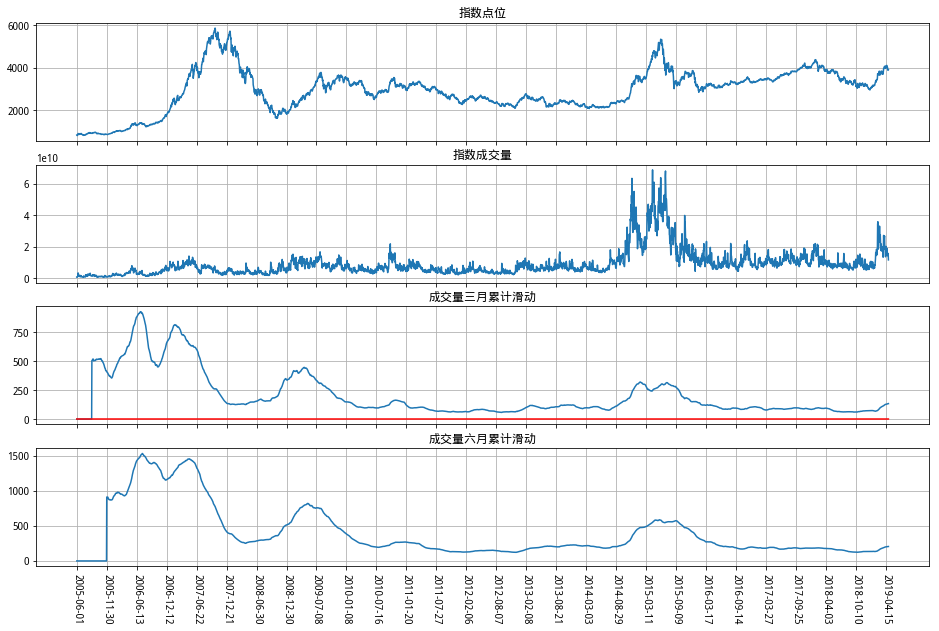

In [33]:
print(x_tick)
fig= plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(index_close)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(412)
plt.plot(index_vol)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(413)
plt.plot(vol_63)
plt.plot([1]*len(index_normal_mon),'r')
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(414)
plt.plot(vol_125)
plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)

plt.grid()


计算下载沪深300净流入资金

In [3]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])

mon=[]
for i in range(len(data.index)):
    stock_list=get_index_stocks('000300.XSHG',data.index[i])
    pct_all =get_price(stock_list,end_date=data.index[i],fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
    percent_yes_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
    for j in range(len(percent_yes_df.ix[0,:])):
        if percent_yes_df.ix[0,j] > 0:
            percent_yes_df.ix[0,j] = 1
        elif percent_yes_df.ix[0,j] == 0:
            percent_yes_df.ix[0,j] = 0
        else:
            percent_yes_df.ix[0,j] = -1
    money=(pct_all['money'].iloc[0,:]*percent_yes_df.iloc[0,:]).sum()
    mon.append(money)
    print(data.index[i])

print(mon[:5],len(mon),len(data.index))
data['money_flow']=mon
write_file('df_index_hs300.csv',data.to_csv(),append=False)

In [2]:
data=pd.read_csv(BytesIO( read_file('df_index_hs300.csv')),index_col=[0])

In [3]:
index_close=data['close']
index_mon_flow=data['money_flow']

x_tick=[]
xtick=[]
for i in range(len(data.index)): 
    if i%125 == 0:#%为整除，即每90个交易日添加一个日期
        x_tick.append(data.index[i])
        xtick.append('')
    #else: x_tick.append("") 
#print(x_tick)
#print(len(index_cap))
print(len(xtick))

28


Text(0.5, 1.0, '净流入资金/市值')

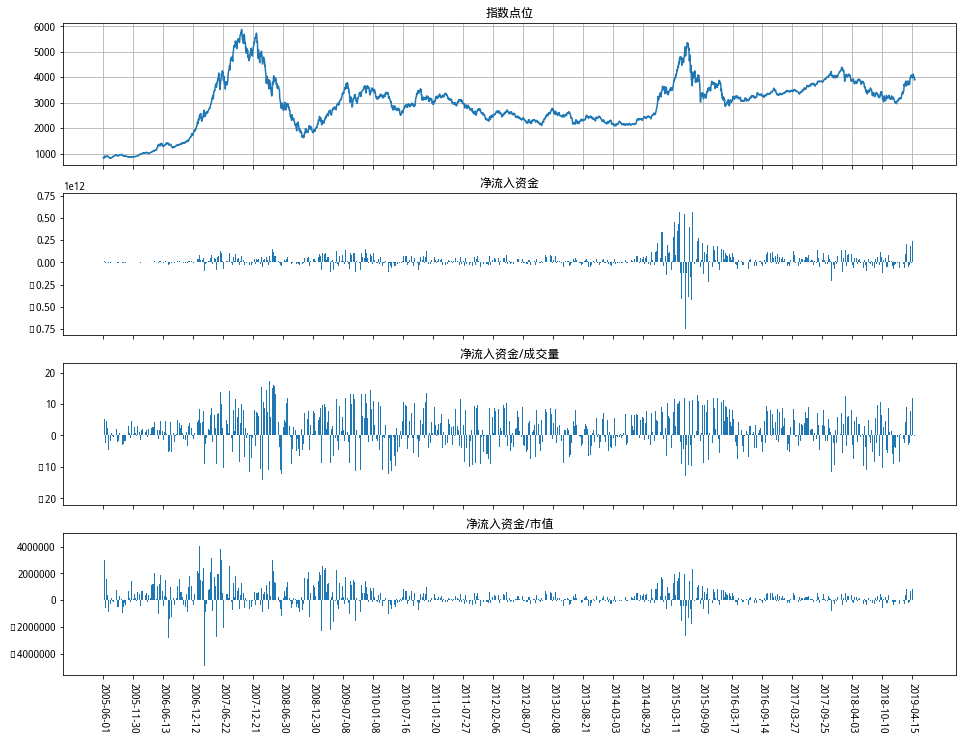

In [15]:
fig= plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(index_close)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(412)
plt.bar(range(len(index_close)),index_mon_flow)
#plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(413)
plt.bar(range(len(index_close)),index_mon_flow/data['volume'])
#plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(414)
plt.bar(range(len(index_close)),index_mon_flow/data['index_sum_cap'])
plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
#plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)


In [4]:
monf_21=[0]*21
monf_42=[0]*42
monf_63=[0]*63
monf_125=[0]*125
for i in range(len(data.index)):
    if i >=21:
        monf_21.append(index_mon_flow[i-21:i].sum())
    if i >=42:
        monf_42.append(index_mon_flow[i-42:i].sum())
    if i >=63:
        monf_63.append(index_mon_flow[i-63:i].sum())
    if i >=125:
        monf_125.append(index_mon_flow[i-125:i].sum())
        

Text(0.5, 1.0, '净流入资金六月滑动累积')

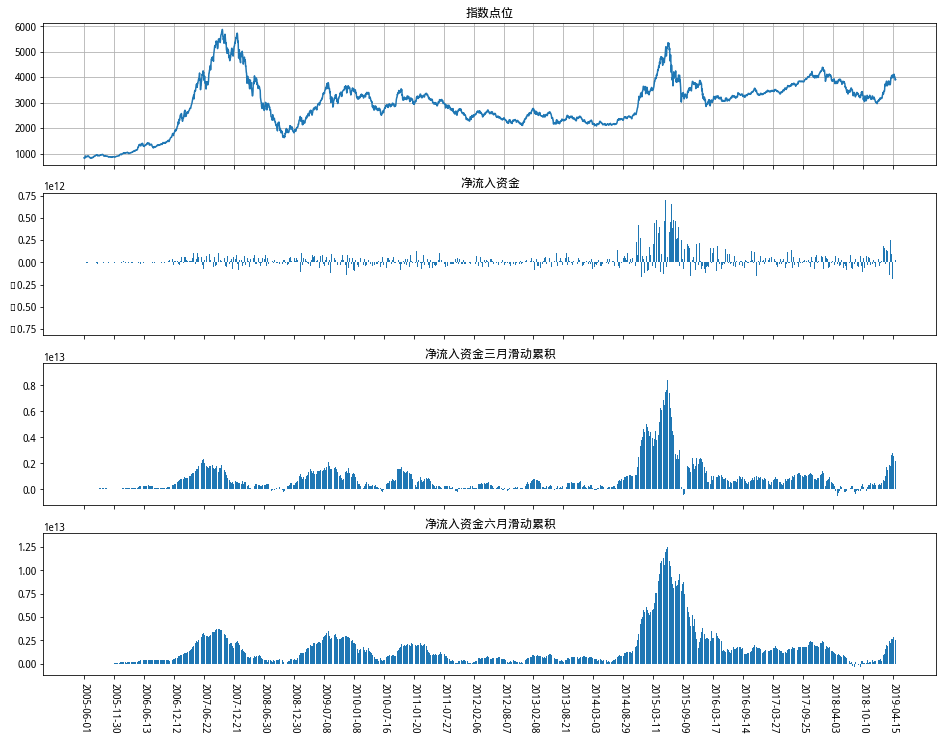

In [5]:
fig= plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(index_close)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.grid()
plt.subplot(412)
plt.bar(range(len(index_close)),index_mon_flow)
#plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(413)
plt.bar(range(len(index_close)),monf_63)
#plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)

plt.subplot(414)
plt.bar(range(len(index_close)),monf_125)
plt.xticks( range(0,len(index_close),125),x_tick,rotation = -90)
#plt.xticks(range(0,len(index_close),125),xtick,rotation = -90)
